**AT82.03: Machine Learning**
>  Student Name: Israt Jahan Nipa
Student ID: st124984

# **A1: Predicting Car Price**
**Assignment 01**

In this assignment, you will solve a problem, i.e., Chaky company makes some car but he has diﬀiculty setting the price for the car. Please make a simple web-based car price prediction system.

* **Note**: You are ENCOURAGED to work with your friends, but DISCOURAGED to blindly copy other’s work. Both parties will be given 0. 
* **Note**: Comments should be provided suﬀiciently so we know you understand. Failure to do so can raise suspicion of possible copying/plagiarism. 
* **Note**: You will be graded upon (1) documentation, (2) experiment, (3) implementation. 
* **Note**: This is a two-weeks assignment, but start early. 
* **Deliverables**: The GitHub link containing the jupyter notebook, a README.md of the github, and the folder of your web application called ‘app’.

**Task 1. Preparing the datasets**  
Download the Car Price dataset from Moodle classroom.  
**_(Downloaded csv file Cars.csv from moodle classroom and stored in data folder 'data/Cars.csv')_**   
Perform loading, EDA, preprocessing, model selection, · · · , inference. Grade will be given based on the how well you adhere to best practices.  
There are some important coding considerations:

## Step 1. Import lib

Here we import the essential libraries that is needed to perform the operation of Loading data, EDA, Preprocessing, Feature Selection, Testing and Inference.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.26.4', '1.5.3', '0.13.2', '3.9.3')

## Step 2. Load data
To load the data we use Pandas which we have already imported above in the Import lib section.

In [4]:
#dataframe (df) load the data to a data frame

df = pd.read_csv('/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/data/Cars.csv')


In [5]:
type(df)

pandas.core.frame.DataFrame

Now we check the type, shape, describe, info, columns of the loaded dataframe

In [6]:
# Check the shape of your data
df.shape #provides information about the number of rows and columns in a DataFrame

(8128, 13)

There are 8128 rows and 13 columns in the dataframe

In [7]:
# Statistical info
df.describe() #returns description of the data in the DataFrame
#if the DataFrame contains numerical data, the description contains information such as count, mean, std, min, 25%, 50%, 75%, and max

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Currently we have only four features in the dataframne with numerical values. Hence, the describe is only returning us with the data description of those features.

In [8]:
# Check dtypes and non-null counts of your input data
df.info() #prints information about the DataFrame
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Here we can see that some of the features contain null values in it. Like mileage, engine, max_power, torque, seats. If these features are deemed important later during the EDA then we must perform some operation to replace the null values with mean, median or mode in the X_train and X_test dataset.

In [9]:
df.dtypes #returns a Series with the data type of each column
#You can check dtype either way from info or from dtype

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [10]:
df.dtypes.value_counts()

object     9
int64      3
float64    1
dtype: int64

The above command provides us with an overview of the dataframe the total number of data types we have in the dataframe, This dataframe contains: 9 objects, 3 integers, and 1 float. 

In [11]:
# Check the column names
df.columns #returns the label of each column in the DataFrame

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [12]:
df.head() #shows the first five rows in a dataframe with heading

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Furthermore, looking at the dtypes, columns, head and info. We can guess from the domain knowledge about which features can have relation and affect prediction of the selling price. From this we can make an inference that features $\mathbf{X}$ like brand, year, km driven, fuel, seller type, transmission, owner, mileage, engine capacity, max power, and seats can affect our target selling price $\mathbf{y}$.

However, to be sure of this we must run EDA to understand the whole scenario of the data before choosing the features.

## Step 3. Exploratory Data Analysis (EDA)

EDA is an essential step to understand and inspect the data, to have a better comprehension about the nature of the given data.  

In EDA we perform label encoding, mapping, univariate and multivariate analysis to determine the probable features. In this section we perform, univariate analysis like: [countplot, distribution plot], and multivariate analysis like [boxplot, scatterplot, correlation matrix] which helps us to determine features.

**Renaming**
Since the columns names are small and we do not see any spaces in the column we let it be as it is. However, the in the Final table shared in the assignments picture we can see that the name feature has been renamed to brand. So let's perform this operation here.

In [13]:
#rename column name to brand
df.rename(columns = {'name':'brand'}, inplace = True)
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Here feature 'name' has been changed to 'brand'.

Now we perform some analysis and try to find some relation of the features with the target.

First let's see how many unique categorical values are there for the features in the dataframe

In [15]:
df['brand'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

**For the feature brand, take only the first word and remove the rest.**  
Since we have many brand names let us only take the first word and remove the rest.

In [16]:
#split the string and keep the first word then check for the unique values
df['brand'] = df['brand'].str.split().str[0]
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [17]:
df['brand'].iloc[50] #this is to check if the value in the brand has any trailing spaces or not

'Honda'

**Drop the feature torque, simply because Chaky’s company does not understand well about it.**

In [18]:
#drop the torque feature
df.drop('torque', axis='columns', inplace=True)
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

Now we have a dataframe as below

In [19]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


**2.1 Univariate analysis**

Single variable exploratory data anlaysis. This analysis provides basic properties and distribution of the variable within a dataset. This method includes observing the central tendency of the mean, median, and mode which indicates the central or typical value of the variable. This analysis also includes the range, variance, standard deviation, and interquartile range (IQR), which describes the spread or variability in the data. Precentiles and Quartiles provide the insight to the distribution of the data. We perform operations such as countplot, boxplot, frequency distribution and others to analyze and understand the single variable's characteristics, distribution, and quality.

Now we perform the univariate analysis (looking at one feature at a time). And trying to find the distribution of the feature, identification of outliers if any, understand data distribution, assess the data quality by revealing missing values, extreme values and any inconsistencies in the data.

**For Continuous Data**: It provides insights into the range, variability, and central tendency of the data.

**For Categorical Data**: It gives an overview of the distribution of different categories and the proportion of each category in the dataset.

Before we perform analyis we can see that some continuous data in the dataframe contains string values together with numeric data. Hence we perform some operations to clean this.

**For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).**  

_Hint: use df.mileage.str.split_

In [20]:
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

In [21]:
df['mileage'].iloc[40]

16.1

So here we have removed 'kmpl' from mileage

**For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol**

In [22]:
#drop rows where the 'fuel' is 'CNG' or 'LPG'
indexFuel = df[(df['fuel'] == 'CNG') | (df['fuel'] == 'LPG')].index 
df.drop(indexFuel, inplace=True)

**For the feature engine, remove “CC” and convert the column to numerical type (e.g., float).**

In [23]:
df['engine'] = df['engine'].str.split().str[0].astype('Int64')

In [24]:
df['engine'].iloc[40]

1497

**Do the same for max power.**

In [25]:
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [24]:
df['max_power'].iloc[40]

117.3

So, we removed bph from max_power here.

Now we can perform some univariate analysis.

<Axes: xlabel='brand', ylabel='count'>

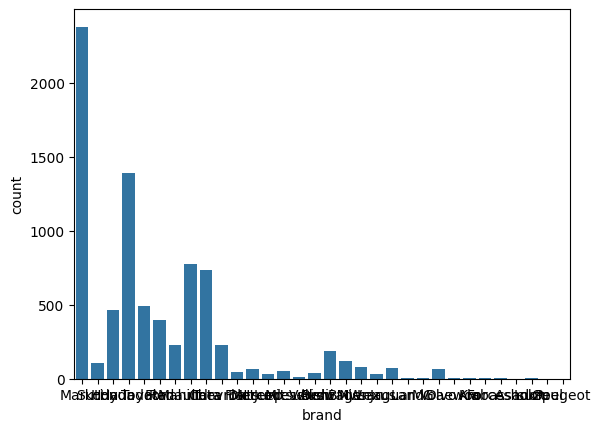

In [25]:
#countplot
sns.countplot(data = df, x='brand')

<Axes: xlabel='fuel', ylabel='count'>

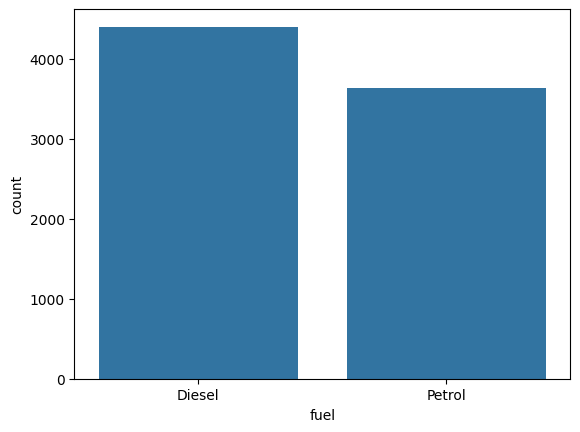

In [26]:
#countplot
sns.countplot(data = df, x='fuel')

<Axes: xlabel='seller_type', ylabel='count'>

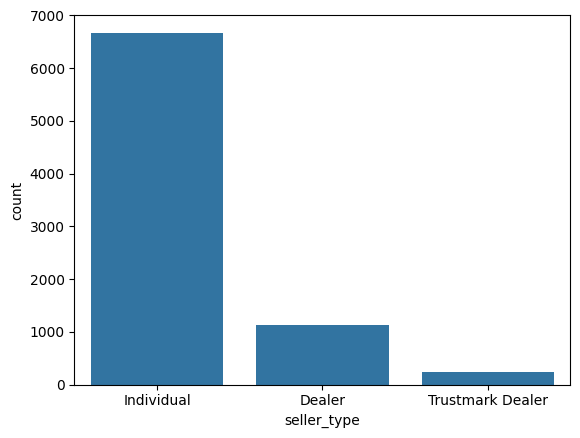

In [27]:
#count plot
sns.countplot(data=df, x='seller_type')

<Axes: xlabel='transmission', ylabel='count'>

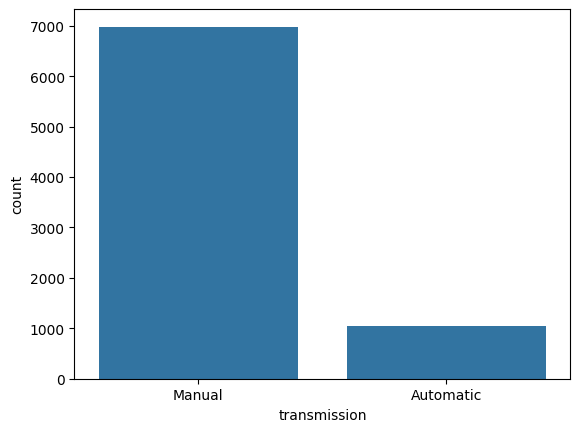

In [28]:
#count plot
sns.countplot(data=df, x='transmission')

<Axes: xlabel='owner', ylabel='count'>

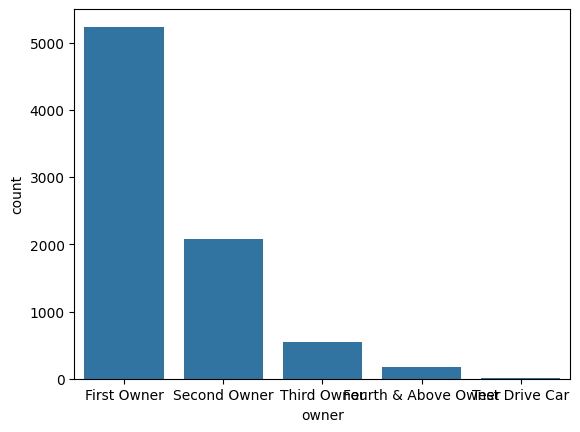

In [29]:
#count plot
sns.countplot(data=df, x='owner')

<Axes: xlabel='seats', ylabel='count'>

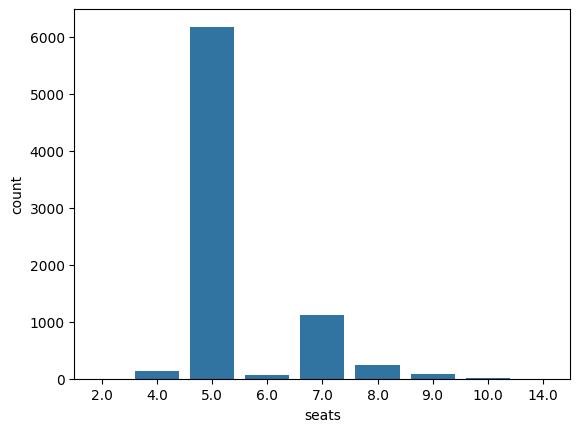

In [30]:
#count plot
sns.countplot(data=df, x='seats')

By performing the count plots in the frequency distribution of categorical variables we are trying to identify if there exists any class imbalances, and detect any rare categories and trends.

Here we came to find out features like brand, seller type, transmission, owner, and seats because of their fequency distribution can result in class imbalance if used for modelling. So, if these categories are to be used then we need to perform some operations like Label encoding or one hot encoding.

We must have some domain knowledge for this so that we can choose features as such.

Fuel type: Disel and Petrol on the other hand shows an almost equal number however some less amount in vehicles operated from petrol. We need further analysis if we can assume fuel as a feature or not.

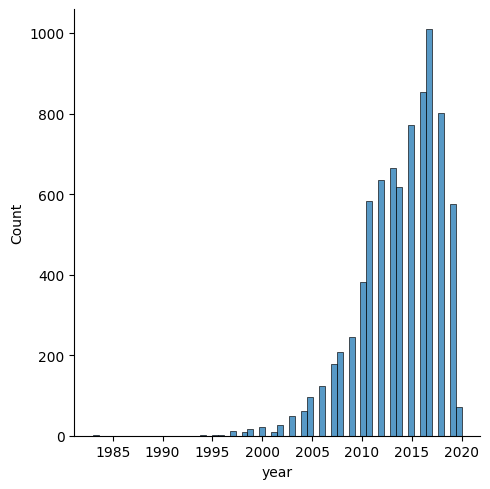

In [26]:
#distribution plot
sns.displot(data=df, x='year')

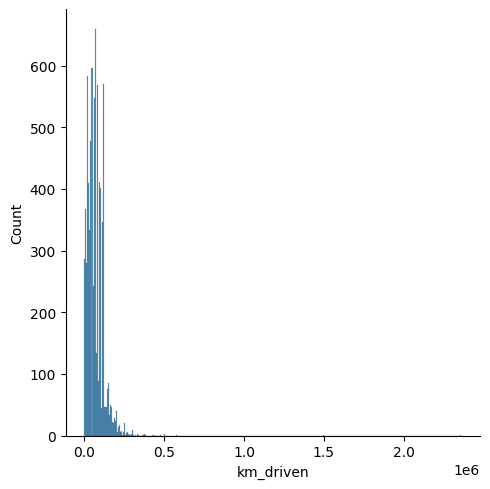

In [27]:
#distribution plot
sns.displot(data=df, x='km_driven')

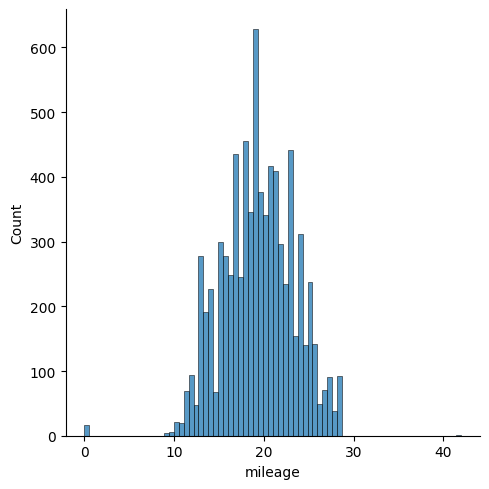

In [28]:
#distribution plot
sns.displot(data=df, x='mileage')

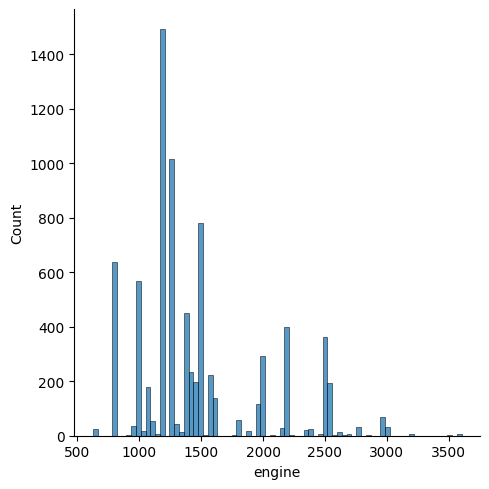

In [29]:
#distribution plot
sns.displot(data=df, x='engine')

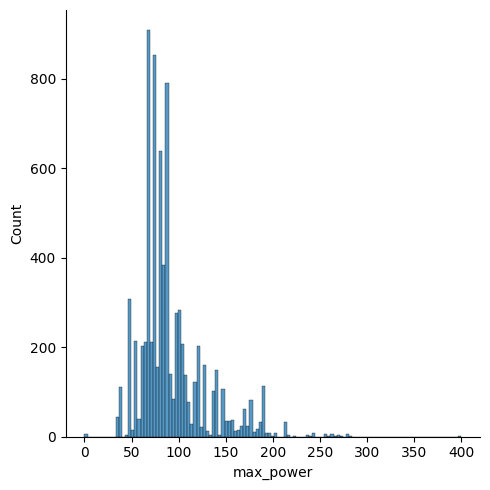

In [30]:
#distribution plot
sns.displot(data=df, x='max_power')

Distribution plot helps to understand the underlying pattern of data, such as its shape, spread, and central tendency. This plot is mostly used in context of continuous data.

Here in this dataset we are trying to infer the shape (Normal, Skewness, bi or multimodal distribution), central tendency, spread of data, and if presence of any outliers.

**year** depicts a distribution plot indicating that there is more data from the recent year as the graph skew more towards the left indicating more data points are clustered to the right. 

**km_driven** is more skewed towards right indicating more data points are clustered to the left. 

**mileage** depicts a central tendency with some outliers. It typically shows of a normal distribution of data.

**engine** on the other hand shows a spread of data with a wider disrtibution indicating higher variablity in the data. However, much of the data here also seemes to be to the left side.

**max_power** feature is more skewed towards right indicating more data points are clustered to the left. We can also see some outliers in max_power.

**2.2 Multivariate analysis**

Multiple variable exploratory data analysis. This involves involves examining more than two variables simultaneously to understand relationships and patterns within the data.

<Axes: xlabel='mileage', ylabel='selling_price'>

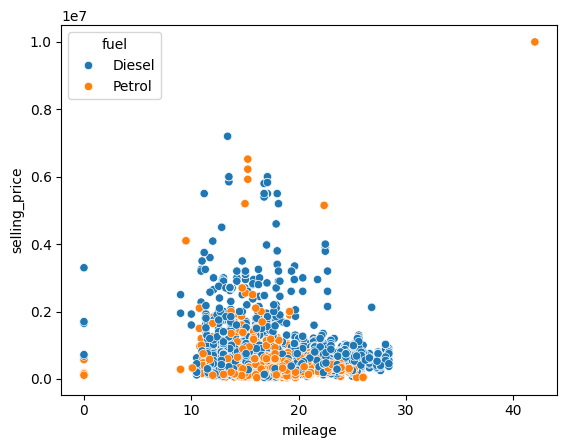

In [31]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='max_power', ylabel='selling_price'>

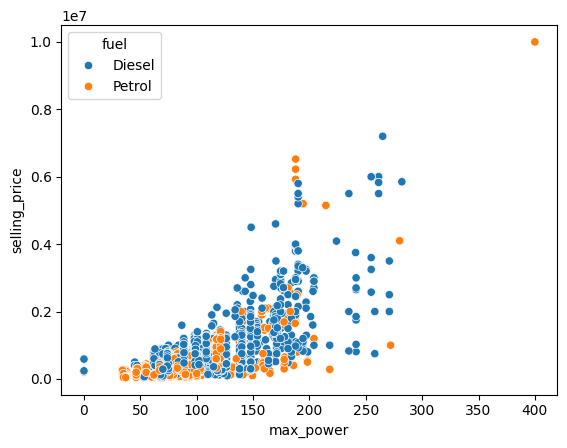

In [37]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='selling_price'>

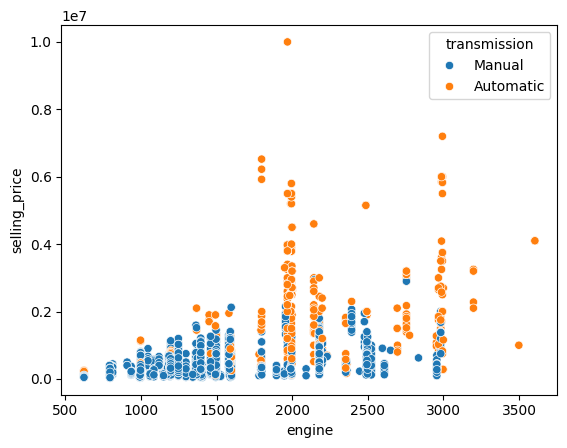

In [38]:
sns.scatterplot(x = df['engine'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='engine', ylabel='max_power'>

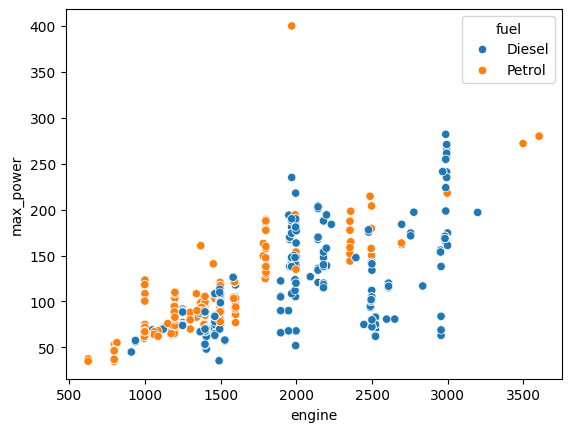

In [39]:
sns.scatterplot(x=df['engine'], y=df['max_power'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='mileage'>

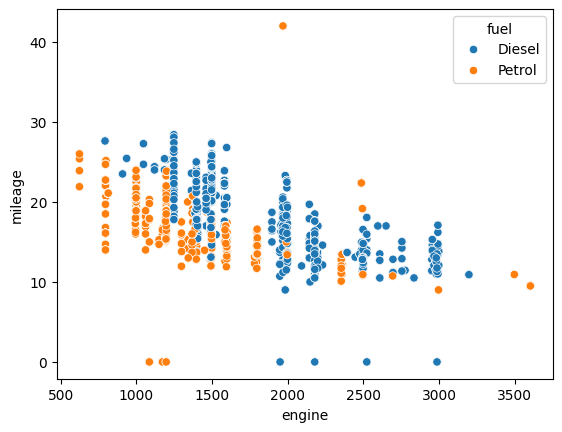

In [32]:
sns.scatterplot(x=df['engine'], y=df['mileage'], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='max_power'>

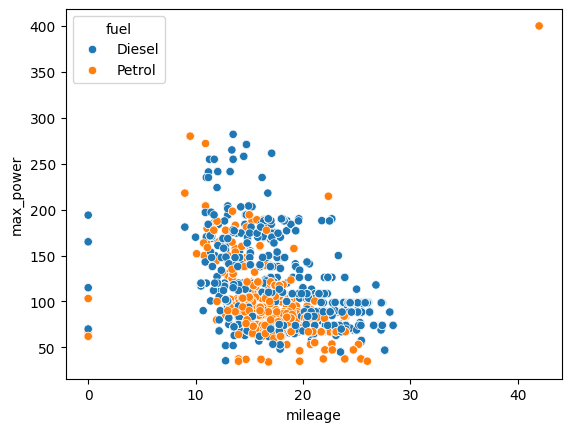

In [41]:
sns.scatterplot(x=df['mileage'], y=df['max_power'], hue=df['fuel'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

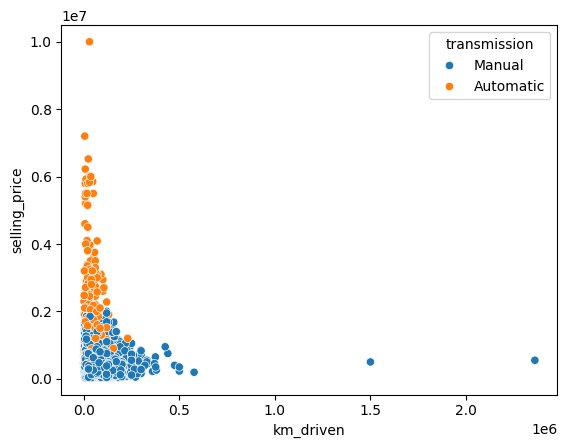

In [33]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'], hue=df['transmission'])

<Axes: xlabel='owner', ylabel='selling_price'>

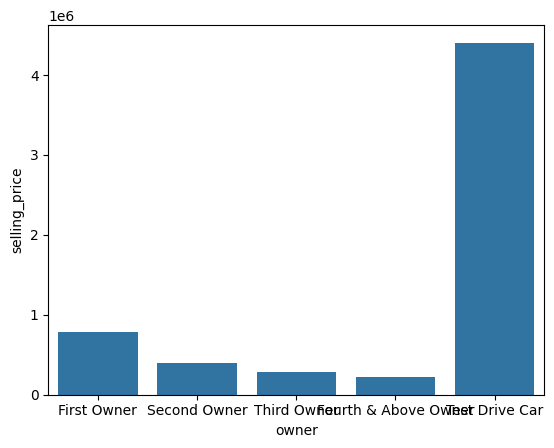

In [34]:
sns.barplot(x=df['owner'], y=df['selling_price'], errorbar=None)

Text(0.5, 0, 'Owner')

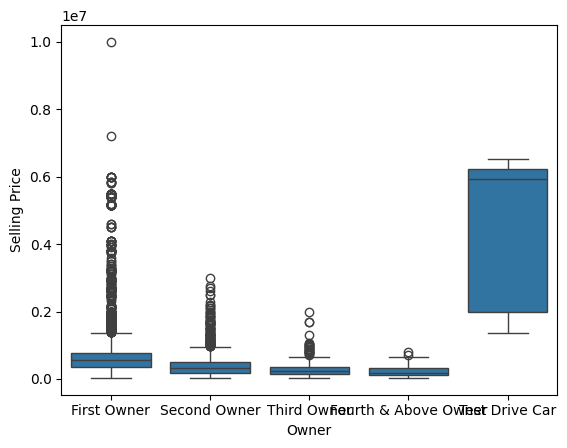

In [44]:
#compare selling price of cars according to owner
sns.boxplot(x = df['owner'], y = df['selling_price'])
plt.ylabel("Selling Price")
plt.xlabel("Owner")

<Axes: xlabel='year', ylabel='selling_price'>

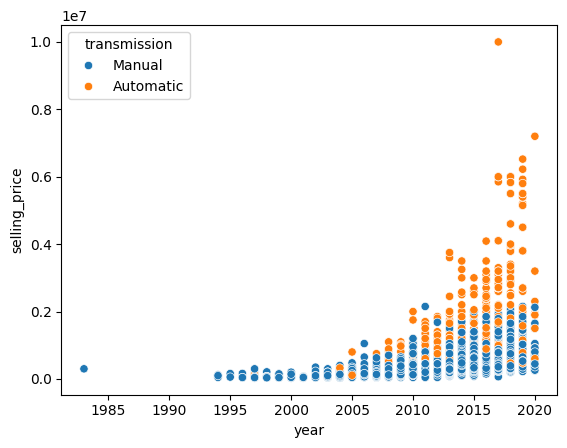

In [45]:
sns.scatterplot(x=df['year'], y=df['selling_price'], hue=df['transmission'])

Text(0, 0.5, 'Selling Price')

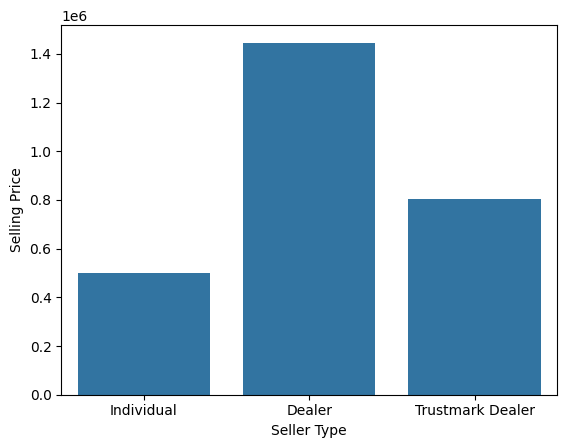

In [46]:
sns.barplot(x = df['seller_type'], y = df['selling_price'], errorbar=None)
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')

From the scatter plots, bar plots and box plots performed above we can infer some idea about the relationship between the different variables. We can see a clear realtion between some independent variables and also the relation of independent variables with the dependent variable. When we plot dependent variable with few independent variable like max_power, engine, and year we are getting positive correlation, whereas in case of km_driven we are experiencing a negative correlation to the dependent variable.

Some the datapoints are either clustered together or scattered suggesting no correlation. We also performed to check correlation between some independent variable to see how they interact and relate to eachother. In this we found that as engine size increases the mileage decreases relatively, and as engine size increases max_power also increases.

We also encountered some outliers in the data however the outliers seems negligible due to its low frequency.

**Correlation Matrix**

Let's use correlation matrix to identify relationship between multiple variables in a dataset. Also we need to check whether certain features show multicollinearity.

<Axes: >

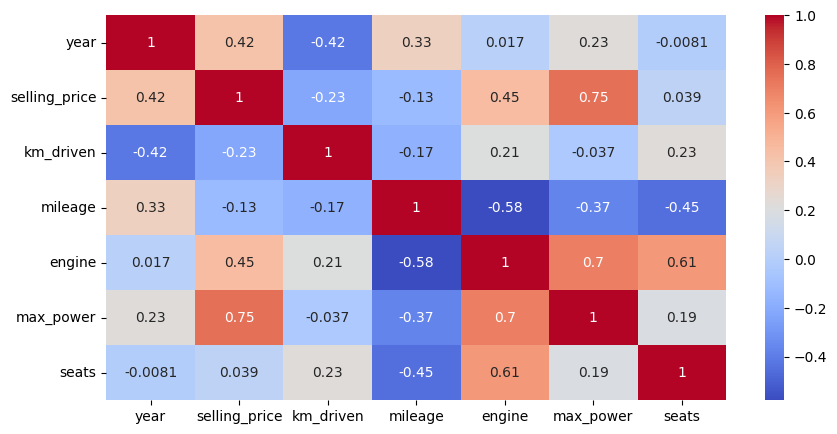

In [35]:
plt.figure(figsize = (10,5))
heatdata = df.corr(numeric_only=True)
sns.heatmap(heatdata, annot=True, cmap="coolwarm")

**Predictive Power Scoring (PPS)**

In [36]:
import pandas as pd
import ppscore as pps

# Test if pandas is correctly installed
print(pd.__version__)

# Test if ppscore is correctly installed
print(pps.__version__)

1.5.3
1.3.0


<Axes: xlabel='x', ylabel='y'>

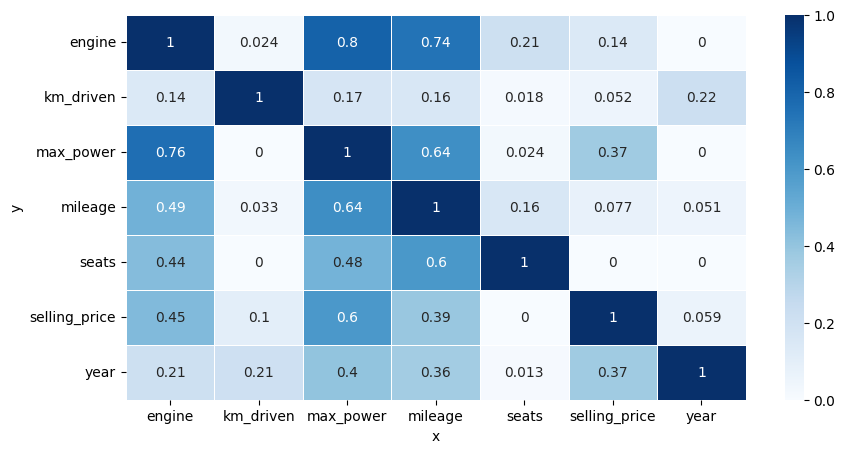

In [37]:
import ppscore as pps

#remove any unnecessary x 
dfcopy = df.copy()
dfcopy.drop(['brand', 'fuel', 'seller_type', 'transmission', 'owner'], axis='columns', inplace=True)

#call pps
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize=(10, 5))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

From the PPS and the analysis performed in EDA we can infer that features such as year, km_driven, max_power, and engine shows a significant role in the increase or decrease of the selling price. However, we can also see the multicollinearity between engine and max_power and both features show postive correlation with selling price. 

=================================================================================

One more thing we observed in the analysis above is of the unusal price for the Test Drive Cars. Hence, we perform the operations below as suggested in the assignment for this.

**For the feature owner, map First owner to 1, ..., Test Drive Car to 5**

Now we would like to change "First owner", "Second owner", "Third owner", "Fourth And Above owner" and "Test Drive Car" to [0, 1, 2, 3, 4, 5], since machine learning algorithms do not understand text. Also, correlation matrix and other similar computational tools require numerical values.

In [38]:
# Map owner to numeric values
owner = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(owner)

**You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.**

From the above boxplot we can see that Test Drive Cars are very expensive and since we do not want to involve this in we delete all samples related to it.

In [39]:
#drop rows where the 'owner' is '5' i.e. 'Test Drive Cars'
indexOwner = df[(df['owner'] == 5)].index 
df.drop(indexOwner, inplace=True)

df['owner'].unique()

array([1, 2, 3, 4])

### Final Data Table

In [40]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0


## Step 4. Feature selection

In feature selection we need to select the most salient $\mathbf{X}$.

Hence from the inference made above in EDA we can identify several features that might influence the selling price of a car, such as brand, year, kilometers driven, fuel type, seller type, transmission, ownership, mileage, engine capacity, and maximum power. However, **based on the final data provided in the data table**, we will focus on the following key features for predicting the selling price: **_year, kilometers driven, ownership, mileage, and engine capacity_**.

**Since selling price is a big number, it can cause your prediction to be very unstable. One trick is to first transform the label using log transform, i.e., y = np.log(df['selling_price'])**

In [41]:
#select the features
X = df[['year', 'km_driven', 'mileage', 'engine']]

#decide the target - as suggested in the question selling price is a big number and it can cause prediction to be very unstable. One trick is to first transform the label using log transform
y = np.log(df[['selling_price']])

Split Train and Test set before preprocessing

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Step 5. Preprocessing

Check for any null values in the feature and target

In [43]:
#check for null values
print("X train:")
X_train[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X train:


year           0
km_driven      0
mileage      154
engine       154
dtype: int64

In [44]:
#check for null values
print("X test:")
X_test[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X test:


year          0
km_driven     0
mileage      60
engine       60
dtype: int64

Now check the distribution of the features with Null value and impute the missing values

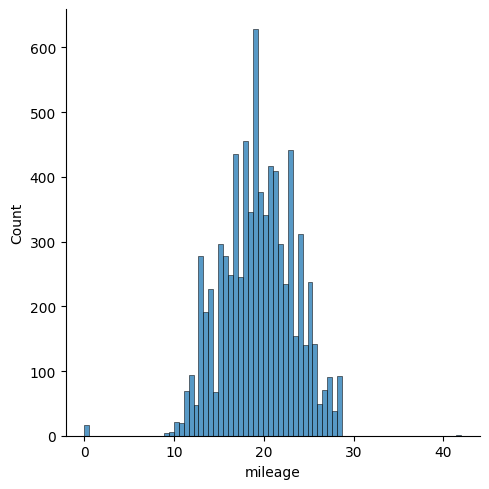

In [56]:
sns.displot(data=df, x='mileage')

Since, mileage has more values centered towards the middle we can perform mean to impute it's missing values.

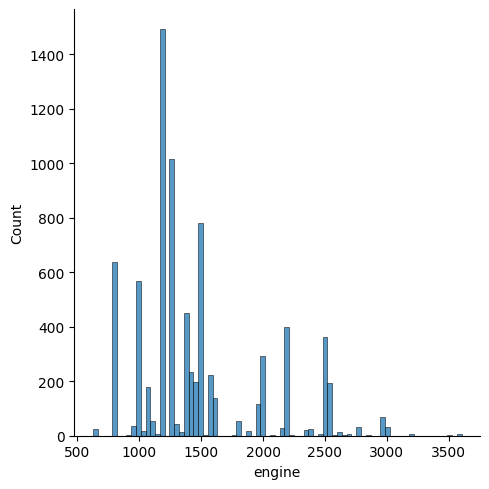

In [57]:
sns.displot(data=df, x='engine')

Here engine is skewed towards right indicating more data points are clustered to the left. So we can perform median to impute the missing values of engine.

In [45]:
#let's fill the training set first
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

In [46]:
#let's fill the testing set with the training distribution
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

In [47]:
#check again if there are still any null values
print("X train:")
X_train[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X train:


year         0
km_driven    0
mileage      0
engine       0
dtype: int64

In [48]:
#check again for null values
print("X test:")
X_test[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X test:


year         0
km_driven    0
mileage      0
engine       0
dtype: int64

In [49]:
y_train.isna().sum(), y_test.isna().sum()

(selling_price    0
 dtype: int64,
 selling_price    0
 dtype: int64)

Since there are no null values in y_train and y_test. We can now perform the unit test.

In [50]:
assert(X_train.shape[0] == y_train.shape[0])

In [51]:
assert(X_test.shape[0] == y_test.shape[0])

**Feature Scaling**

Since, some Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. Large differences in feature scales can cause the optimization process to be inefficient, leading to poor model performance. Hence we avoid feature scaling in this case.

**_Citation:_**
**_Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed., p. 72 - Feature Scaling). O'Reilly Media._**

## Step 6. Model Selection

In [52]:
### cross validation way!!

#step 1. define all the algorithms you want to compare
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor   
from sklearn.tree import DecisionTreeRegressor

algorithms = [LinearRegression(), SVR(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor()]

algorithms_name = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor']

In [53]:
#step 2. cross validate
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse  = []

kfold = KFold(n_splits = 5, shuffle=True)
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores}; Mean: {scores.mean()}")

LinearRegression: Score: [-0.17552101 -0.17209037 -0.17756991 -0.19851833 -0.15604368]; Mean: -0.17594865881008118
SVR: Score: [-0.55348085 -0.5494556  -0.56725407 -0.50543273 -0.47033266]; Mean: -0.5291911829129091
RandomForestRegressor: Score: [-0.07094987 -0.05990619 -0.06086779 -0.06427267 -0.06196992]; Mean: -0.06359328735364547
KNeighborsRegressor: Score: [-0.26168031 -0.25545054 -0.23375075 -0.21890923 -0.24339335]; Mean: -0.24263683775560896
DecisionTreeRegressor: Score: [-0.09290358 -0.10903116 -0.10985623 -0.09070819 -0.09510855]; Mean: -0.09952153984490582


In [54]:
#step 3: grid search
from sklearn.model_selection import GridSearchCV
#Gridsearch is just cross_validation but on one single model

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=kfold,
                    n_jobs=-1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [56]:
best_mse = grid.best_score_
best_mse

-0.0659659657339204

## Step 7. Testing

**During inference/testing, you have to transform your predicted y backed before comparing with y test, i.e., pred_y = np.exp(pred_y)**

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

pred_y = grid.predict(X_test)
pred_y = np.exp(pred_y)
y_test = np.exp(y_test)

print("MSE: ", mean_squared_error(y_test, pred_y))
print("r2: ", r2_score(y_test, pred_y))

MSE:  59421491764.438835
r2:  0.9110818763209688


## Step 8. Analysis : Feature Importance

In [58]:
rf = grid.best_estimator_

In [59]:
rf.feature_importances_

array([0.48013627, 0.0923068 , 0.06683812, 0.36071881])

<BarContainer object of 4 artists>

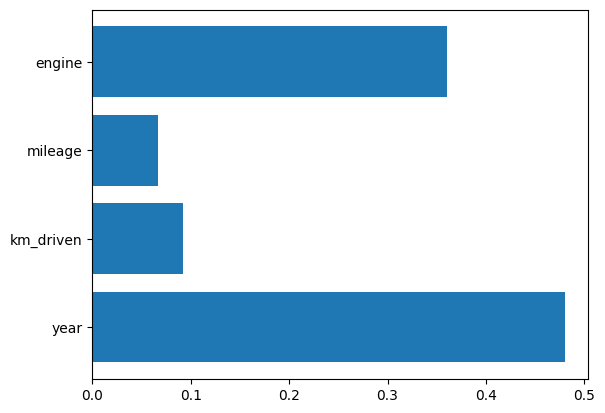

In [60]:
plt.barh(X.columns, rf.feature_importances_)

## Step 9. Inference

In [61]:
import os
import pickle

# Define the directory path
directory = '/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/model'

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Save the model
filename = os.path.join(directory, 'carpricepredictionA1.pickle')
pickle.dump(grid, open(filename, 'wb'))


In [ ]:
#import pickle

# save the model to disk
#filename = 'model/carpriceprediction.pickle'
#pickle.dump(grid, open(filename, 'wb'))

In [62]:


# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [63]:
predict = loaded_model.predict(X_test)
np.exp(predict)

array([197704.51228839, 862431.31028957, 292153.50974155, ...,
       159671.70995656, 790655.89793439, 305282.79291494])

In [64]:
#step 3: predict
sample = df[['year', 'km_driven', 'mileage', 'engine', 'selling_price']].loc[30]
sample

year               2017.0
km_driven         70000.0
mileage              24.3
engine             1248.0
selling_price    670000.0
Name: 30, dtype: Float64

In [65]:
sample_np = np.array([[2017, 70000, 24.3, 1248]])

In [66]:
answer = np.exp(loaded_model.predict(sample_np))
answer

array([769481.25271832])

## Report 
In the end of the notebook, please write a 2-3 paragraphs summary deeply discussing and analysing the results. Possible points of discussion:  
**• Which features are important? Which are not? Why?**  
**• Which algorithm performs well? Which does not? Why?**  
(here, you haven’t learned about any algorithms yet, but you can search online a bit and start building an intuition)

**Summary**  
In the assignment of Car Price Prediction, we performed the big picture of Machine Learning from Importing Libraries, Loading data to the deployment of the model in a web-based application. 

Firstly, we performed the Exploratory Data Analysis (EDA) where we tried to understand the data, and perform mapping and plotting to get some idea about the dataset by doing univariate, multivariate, correlation and ppscore. It provided us with some insight in to the dataset such as class imbalance, correlation, and multicollinearity between some features. For e.g.: By performing the count plots in the frequency distribution of categorical variables we identified there exists class imbalances in features like brand, seller type, transmission, owner and seats. We came to find out these features because of their fequency distribution can result in class imbalance if used for modelling. So, if we want to use these categories then we need to perform some operations like Label encoding or one hot encoding. 

Furthermore, we performed distribution plot which helps to understand the underlying pattern of data, such as its shape, spread, and central tendency. Here in this dataset:  
**year** depicts a distribution plot indicating that there is more data from the recent year as the graph skew more towards the left indicating more data points are clustered to the right. 

**km_driven** is skewed towards right indicating more data points are clustered to the left. 

**mileage** depicts a central tendency with some outliers. It typically shows of a normal distribution of data.

**engine** on the other hand shows a spread of data with a wider disrtibution indicating higher variablity in the data. However, much of the data here also seemes to be to the left.

**max_power** is skewed towards right indicating more data points are clustered to the left. We can also see some outliers in max_power.

Moreover, from the scatter plots, bar plots and box plots we inferred some idea about the relationship between the different variables. We saw a clear realtion between some independent variables and also the relation of independent variables with the dependent variable. When we plot dependent variable with few independent variable like max_power, engine, and year we are getting positive correlation, whereas in case of km_driven we are experiencing a negative correlation to the dependent variable. Some the datapoints are either clustered together or scattered suggesting no correlation. We also performed to check correlation between some independent variable to see how they interact and relate to eachother. In this we found that as engine size increases the mileage decreases relatively, and as engine size increases max_power also increases. We also encountered a negative correlation between selling price and km driven where selling price increased when km driven was decreased. Some outliers were also found in the data however the outliers seems negligible due to its low frequency.

In addition we performed correlation matrix and predictive power score. From the PPS and the analysis performed in EDA we inferred that features such as year, km_driven, max_power, engine, and mileage shows a significant role in the increase or decrease of the selling price. However, we can also see the multicollinearity between engine and max_power and both features show postive correlation with selling price.

Secondly, we performed model selection where we compared between different algorithms' performance. In this process we used regression algorithm such as 'LinearRegression', 'SVR', 'RandomForestRegressor', 'KNeighborsRegressor', and 'DecisionTreeRegressor'.



From the results, we can observe that the Random Forest Regressor algorithm outperforms other algorithms, achieving the lowest Negative MSE of **-0.062088108995806676**. Moreover, in testing phase we get **MSE: 59500321336.406975** and **r²: 0.910963916010285**. Random Forest Regressor performs well in this because of its ability to model complex, non-linear relationships between features and the target. However still we can see that the model is predicting an overfitted value to the original one. The model is performing much better on the training data than on the validation data, which indicates that it's overfitting to the training set. To address this issue, you could make the model simpler by applying some constraints to it (like regularization), or trying to gather more training data.

**Note**: Since this is a Tree based algorithm hence, algorithms like Decision Trees, Random Forests, and Gradient Boosted Trees do not require scaling, as they are not distance-based and are not affected by feature magnitudes. Also some Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. Large differences in feature scales can cause the optimization process to be inefficient, leading to poor model performance. Hence we avoid feature scaling in this case. [1]
